In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import re
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
Number of articles-summary pairs: 287113
Number of distinct words in article: 810883
Number of distinct words in summary: 201694
Number of distinct words common in article and summary: 176408
Mean number of word in summary: 46.88636529868031
Mean number of word in article: 677.4758892840101
Mean number of sentences per article: 3.7898144632949395
Mean compression ratio: 16.012921894895314
Mean extractive fragment coverage: 0.8635503034940778
Mean extractive fragment density: 3.3318217257143927


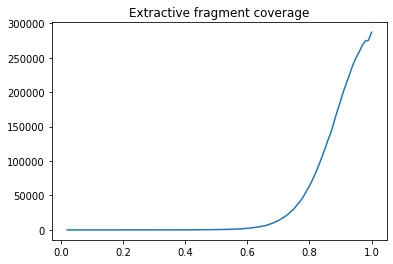

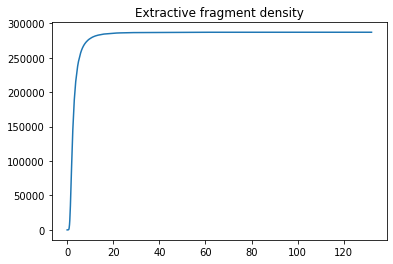

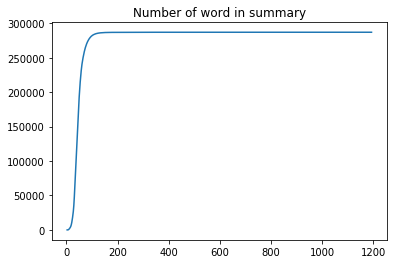

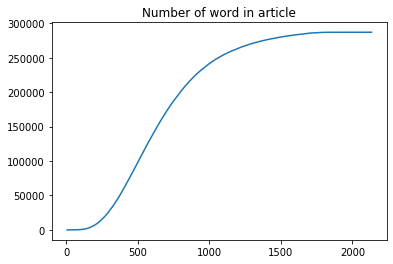

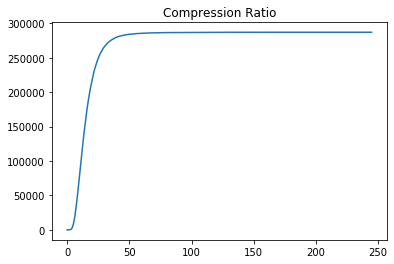

In [2]:
cnn = tfds.load('cnn_dailymail')

cnn = cnn['train']

vocab_article = set()
vocab_summary = set()

cnt = 0
sentence = 0
word_article = 0
word_highlight = 0
comp_ratio = 0
ext_coverage = 0
ext_density = 0

mean_word_article = {}
mean_word_highlight = {}
mean_cmp_ratio = {}
mean_ext_coverage = {}
mean_ext_density = {}

def extractive_fragment(article, summary):
    F = []
    i = 0
    j = 0
    p = len(article)
    q = len(summary)
    while i < q:
        f = []
        while j < p:
            if summary[i] == article[j]:
                tmp_i = i
                tmp_j = j
                while tmp_i < q and tmp_j < p and summary[tmp_i] == article[tmp_j]:
                    tmp_i += 1
                    tmp_j += 1
                if len(f) < (tmp_i - i):
                    f = summary[i:tmp_i]
                j = tmp_j
            else:
                j += 1
        i = i + max(len(f), 1)
        j = 0
        F.append(f)
    return F
    
for i in cnn:
    
    cnt += 1
        
    highlight = i['highlights']
    article = i['article']
    
    highlight = np.array(highlight).tolist().decode("utf-8")
    article = np.array(article).tolist().decode("utf-8")
    
#     print(highlight, article)
    
    highlight = highlight.split('\n')
    
    r = len(highlight)
    sentence += r
    
    article = article.split(' ')
    for i in range(r):
        highlight[i] = highlight[i].split(' ')
    
    article = [re.sub('[^a-zA-Z0-9]',' ',char.lower()).replace(' ', '') for char in article]
    article = [char for char in article if char != '']
    
    for i in range(r):
        highlight[i] = [re.sub('[^a-zA-Z]',' ',char.lower()).replace(' ', '') for char in highlight[i]]
        highlight[i] = [char for char in highlight[i] if char != '']
    
    for j in article:
        vocab_article.add(j)
    
    p = len(article)
    
    word_article += p
    
    summary = []
    
    for i in range(r):
        q = len(highlight[i])
        for word in highlight[i]:
            summary.append(word)
        word_highlight += q
        
    m = len(summary)
    
    comp_ratio += (p/m)
    for j in summary:
        vocab_summary.add(j)
    F = extractive_fragment(article, summary)
    cov = 0
    den = 0
    for f in F:
        cov += len(f)
        den += len(f) * len(f)
    cov = cov / m
    den = den / m
    ext_coverage += cov
    ext_density += den
    
    if round(p/m, 2) in mean_cmp_ratio:
        mean_cmp_ratio[round(p/m, 2)] += 1
    else:
        mean_cmp_ratio[round(p/m, 2)] = 1
    
    if p in mean_word_article:
        mean_word_article[p] += 1
    else:
        mean_word_article[p] = 1
    
    if m in mean_word_highlight:
        mean_word_highlight[m] += 1
    else:
        mean_word_highlight[m] = 1
    
    if round(cov, 2) in mean_ext_coverage:
        mean_ext_coverage[round(cov, 2)] += 1
    else:
        mean_ext_coverage[round(cov, 2)] = 1
        
    if round(den, 2) in mean_ext_density:
        mean_ext_density[round(den, 2)] += 1
    else:
        mean_ext_density[round(den, 2)] = 1

    if cnt % 10000 == 0:
        print(cnt)
    
# print(len(vocab_article), len(vocab_summary))
    
comp_ratio = comp_ratio / cnt
word_highlight = word_highlight / cnt
ext_coverage = ext_coverage / cnt
ext_density = ext_density / cnt
word_article = word_article / cnt
sentence = sentence / cnt

common = 0
for word in vocab_summary:
    if word in vocab_article:
        common += 1
    
# print(common)
# print(sentence, word_article, word_highlight, comp_ratio, ext_coverage, ext_density)

print("Number of articles-summary pairs: " + str(cnt))
print("Number of distinct words in article: " + str(len(vocab_article)))
print("Number of distinct words in summary: " + str(len(vocab_summary)))
print("Number of distinct words common in article and summary: " + str(common))
print("Mean number of word in summary: " + str(word_highlight))
print("Mean number of word in article: " + str(word_article))
print("Mean number of sentences per article: " + str(sentence))
print("Mean compression ratio: " + str(comp_ratio))
print("Mean extractive fragment coverage: " + str(ext_coverage))
print("Mean extractive fragment density: " + str(ext_density))

def plot(data, title, name):
    x = []
    y = []
    cur = 0
    for key in sorted(data):
        x.append(key)
        cur += data[key]
        y.append(cur)
        
    plt.plot(x, y)
    plt.title(title)
    plt.savefig(name, dpi=300, bbox_inches='tight')
    plt.show()
    
plot(mean_ext_coverage, 'Extractive fragment coverage', 'cnn_mean_ext_coverage.png')
plot(mean_ext_density, 'Extractive fragment density', 'cnn_mean_ext_density.png')
plot(mean_word_highlight, 'Number of word in summary', 'cnn_mean_word_highlight.png')
plot(mean_word_article, 'Number of word in article', 'cnn_mean_word_article.png')
plot(mean_cmp_ratio, 'Compression Ratio', 'cnn_mean_cmp_ratio.png')

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

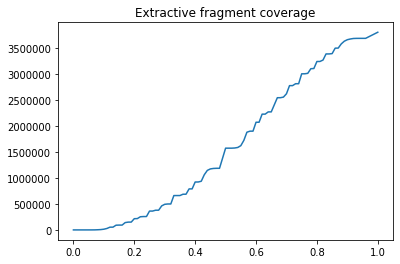

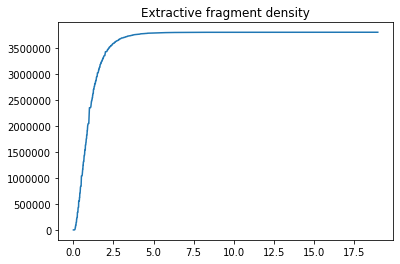

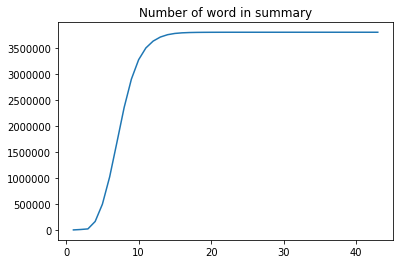

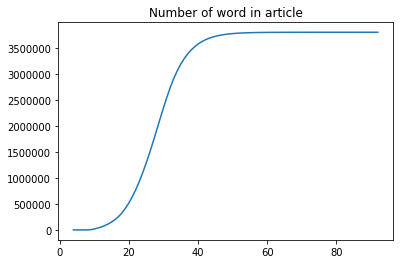

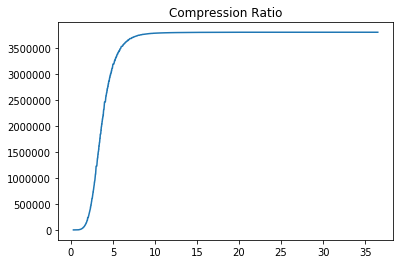

In [3]:
gigaword = tfds.load('gigaword')

gigaword = gigaword['train']

vocab_article = set()
vocab_summary = set()

cnt = 0
sentence = 0
word_article = 0
word_highlight = 0
comp_ratio = 0
ext_coverage = 0
ext_density = 0

mean_word_article = {}
mean_word_highlight = {}
mean_cmp_ratio = {}
mean_ext_coverage = {}
mean_ext_density = {}

def extractive_fragment(article, summary):
    F = []
    i = 0
    j = 0
    p = len(article)
    q = len(summary)
    while i < q:
        f = []
        while j < p:
            if summary[i] == article[j]:
                tmp_i = i
                tmp_j = j
                while tmp_i < q and tmp_j < p and summary[tmp_i] == article[tmp_j]:
                    tmp_i += 1
                    tmp_j += 1
                if len(f) < (tmp_i - i):
                    f = summary[i:tmp_i]
                j = tmp_j
            else:
                j += 1
        i = i + max(len(f), 1)
        j = 0
        F.append(f)
    return F
    
for i in gigaword:
    
    cnt += 1
        
    highlight = i['summary']
    article = i['document']
    
    highlight = np.array(highlight).tolist().decode("utf-8")
    article = np.array(article).tolist().decode("utf-8")
    
#     print(highlight, article)
    
    highlight = highlight.split('\n')
    
    r = len(highlight)
    sentence += r
    
    article = article.split(' ')
    for i in range(r):
        highlight[i] = highlight[i].split(' ')
    
    article = [re.sub('[^a-zA-Z0-9]',' ',char.lower()).replace(' ', '') for char in article]
    article = [char for char in article if char != '']
    
    for i in range(r):
        highlight[i] = [re.sub('[^a-zA-Z]',' ',char.lower()).replace(' ', '') for char in highlight[i]]
        highlight[i] = [char for char in highlight[i] if char != '']
    
    for j in article:
        vocab_article.add(j)
    
    p = len(article)
    
    word_article += p
    
    summary = []
    
    for i in range(r):
        q = len(highlight[i])
        for word in highlight[i]:
            summary.append(word)
        word_highlight += q
        
    m = len(summary)
    
    comp_ratio += (p/m)
    for j in summary:
        vocab_summary.add(j)
    F = extractive_fragment(article, summary)
    cov = 0
    den = 0
    for f in F:
        cov += len(f)
        den += len(f) * len(f)
    cov = cov / m
    den = den / m
    ext_coverage += cov
    ext_density += den
    
    if round(p/m, 2) in mean_cmp_ratio:
        mean_cmp_ratio[round(p/m, 2)] += 1
    else:
        mean_cmp_ratio[round(p/m, 2)] = 1
    
    if p in mean_word_article:
        mean_word_article[p] += 1
    else:
        mean_word_article[p] = 1
    
    if m in mean_word_highlight:
        mean_word_highlight[m] += 1
    else:
        mean_word_highlight[m] = 1
    
    if round(cov, 2) in mean_ext_coverage:
        mean_ext_coverage[round(cov, 2)] += 1
    else:
        mean_ext_coverage[round(cov, 2)] = 1
        
    if round(den, 2) in mean_ext_density:
        mean_ext_density[round(den, 2)] += 1
    else:
        mean_ext_density[round(den, 2)] = 1

    if cnt % 10000 == 0:
        print(cnt)
    
# print(len(vocab_article), len(vocab_summary))
    
comp_ratio = comp_ratio / cnt
word_highlight = word_highlight / cnt
ext_coverage = ext_coverage / cnt
ext_density = ext_density / cnt
word_article = word_article / cnt
sentence = sentence / cnt

common = 0
for word in vocab_summary:
    if word in vocab_article:
        common += 1
    
# print(common)
# print(sentence, word_article, word_highlight, comp_ratio, ext_coverage, ext_density)

print("Number of articles-summary pairs: " + str(cnt))
print("Number of distinct words in article: " + str(len(vocab_article)))
print("Number of distinct words in summary: " + str(len(vocab_summary)))
print("Number of distinct words common in article and summary: " + str(common))
print("Mean number of word in summary: " + str(word_highlight))
print("Mean number of word in article: " + str(word_article))
print("Mean number of sentences per article: " + str(sentence))
print("Mean compression ratio: " + str(comp_ratio))
print("Mean extractive fragment coverage: " + str(ext_coverage))
print("Mean extractive fragment density: " + str(ext_density))

def plot(data, title, name):
    x = []
    y = []
    cur = 0
    for key in sorted(data):
        x.append(key)
        cur += data[key]
        y.append(cur)
        
    plt.plot(x, y)
    plt.title(title)
    plt.savefig(name, dpi=300, bbox_inches='tight')
    plt.show()
    
plot(mean_ext_coverage, 'Extractive fragment coverage', 'giga_mean_ext_coverage.png')
plot(mean_ext_density, 'Extractive fragment density', 'giga_mean_ext_density.png')
plot(mean_word_highlight, 'Number of word in summary', 'giga_mean_word_highlight.png')
plot(mean_word_article, 'Number of word in article', 'giga_mean_word_article.png')
plot(mean_cmp_ratio, 'Compression Ratio', 'giga_mean_cmp_ratio.png')

Number of articles-summary pairs: 5386
Number of distinct words in article: 57673
Number of distinct words in summary: 11807
Number of distinct words common in article and summary: 10682
Mean number of word in summary: 11.81414779056814
Mean number of word in article: 161.78908280727813
Mean number of sentences per article: 1.0
Mean compression ratio: 14.626952640907215
Mean extractive fragment coverage: 0.6493958848470976
Mean extractive fragment density: 1.412259883074382


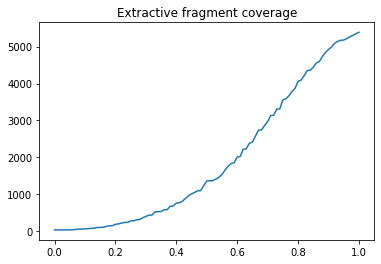

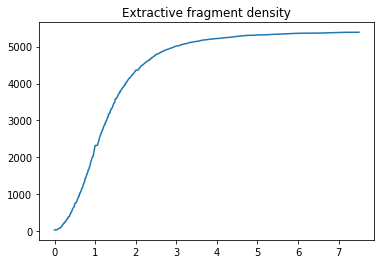

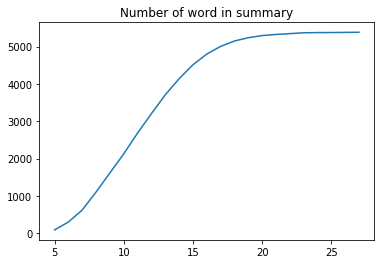

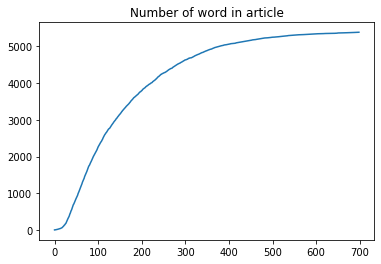

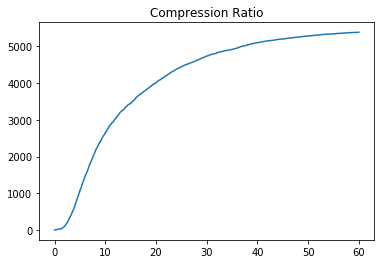

In [14]:
tree = ET.parse('freepressjournal.xml')
root = tree.getroot()

vocab_article = set()
vocab_summary = set()

cnt = 0
sentence = 0
word_article = 0
word_highlight = 0
comp_ratio = 0
ext_coverage = 0
ext_density = 0

mean_word_article = {}
mean_word_highlight = {}
mean_cmp_ratio = {}
mean_ext_coverage = {}
mean_ext_density = {}

def extractive_fragment(article, summary):
    F = []
    i = 0
    j = 0
    p = len(article)
    q = len(summary)
    while i < q:
        f = []
        while j < p:
            if summary[i] == article[j]:
                tmp_i = i
                tmp_j = j
                while tmp_i < q and tmp_j < p and summary[tmp_i] == article[tmp_j]:
                    tmp_i += 1
                    tmp_j += 1
                if len(f) < (tmp_i - i):
                    f = summary[i:tmp_i]
                j = tmp_j
            else:
                j += 1
        i = i + max(len(f), 1)
        j = 0
        F.append(f)
    return F
    
for i in range(0, len(root), 4):
    
    highlight = root[i+1].text
    article = root[i+2].text
#     print(highlight, article)
    
    highlight = highlight.split('\n')
    
    r = len(highlight)
    
    article = article.split(' ')
    for i in range(r):
        highlight[i] = highlight[i].split(' ')
    
    article = [re.sub('[^a-zA-Z0-9]',' ',char.lower()).replace(' ', '') for char in article]
    article = [char for char in article if char != '']
    
    for i in range(r):
        highlight[i] = [re.sub('[^a-zA-Z]',' ',char.lower()).replace(' ', '') for char in highlight[i]]
        highlight[i] = [char for char in highlight[i] if char != '']
    
    p = len(article)
        
    summary = []
    
    for i in range(r):
        q = len(highlight[i])
        for word in highlight[i]:
            summary.append(word)
        
    m = len(summary)
    
    F = extractive_fragment(article, summary)
    cov = 0
    den = 0
    for f in F:
        cov += len(f)
        den += len(f) * len(f)
    cov = cov / m
    den = den / m
        
    sentence += r
    word_highlight += m
    word_article += p
    
    for j in article:
        vocab_article.add(j)
    
    for j in summary:
        vocab_summary.add(j)
    
    cnt += 1
    
    comp_ratio += (p/m)
    
    
    ext_coverage += cov
    ext_density += den
    
    if round(p/m, 2) in mean_cmp_ratio:
        mean_cmp_ratio[round(p/m, 2)] += 1
    else:
        mean_cmp_ratio[round(p/m, 2)] = 1
    
    if p in mean_word_article:
        mean_word_article[p] += 1
    else:
        mean_word_article[p] = 1
    
    if m in mean_word_highlight:
        mean_word_highlight[m] += 1
    else:
        mean_word_highlight[m] = 1
    
    if round(cov, 2) in mean_ext_coverage:
        mean_ext_coverage[round(cov, 2)] += 1
    else:
        mean_ext_coverage[round(cov, 2)] = 1
        
    if round(den, 2) in mean_ext_density:
        mean_ext_density[round(den, 2)] += 1
    else:
        mean_ext_density[round(den, 2)] = 1
    
comp_ratio = comp_ratio / cnt
word_highlight = word_highlight / cnt
ext_coverage = ext_coverage / cnt
ext_density = ext_density / cnt
word_article = word_article / cnt
sentence = sentence / cnt

common = 0
for word in vocab_summary:
    if word in vocab_article:
        common += 1
    
print("Number of articles-summary pairs: " + str(cnt))
print("Number of distinct words in article: " + str(len(vocab_article)))
print("Number of distinct words in summary: " + str(len(vocab_summary)))
print("Number of distinct words common in article and summary: " + str(common))
print("Mean number of word in summary: " + str(word_highlight))
print("Mean number of word in article: " + str(word_article))
print("Mean number of sentences per article: " + str(sentence))
print("Mean compression ratio: " + str(comp_ratio))
print("Mean extractive fragment coverage: " + str(ext_coverage))
print("Mean extractive fragment density: " + str(ext_density))

def plot(data, title, name):
    x = []
    y = []
    cur = 0
    for key in sorted(data):
        x.append(key)
        cur += data[key]
        y.append(cur)
        
    plt.plot(x, y)
    plt.title(title)
    plt.savefig(name, dpi=300, bbox_inches='tight')
    plt.show()
    
plot(mean_ext_coverage, 'Extractive fragment coverage', 'free_mean_ext_coverage.png')
plot(mean_ext_density, 'Extractive fragment density', 'free_mean_ext_density.png')
plot(mean_word_highlight, 'Number of word in summary', 'free_mean_word_highlight.png')
plot(mean_word_article, 'Number of word in article', 'free_mean_word_article.png')
plot(mean_cmp_ratio, 'Compression Ratio', 'free_mean_cmp_ratio.png')

Number of articles-summary pairs: 2196
Number of distinct words in article: 43896
Number of distinct words in summary: 6673
Number of distinct words common in article and summary: 6388
Mean number of word in summary: 11.8816029143898
Mean number of word in article: 437.14071038251365
Mean number of sentences per article: 1.0
Mean compression ratio: 38.75446019461595
Mean extractive fragment coverage: 0.7533885462814058
Mean extractive fragment density: 1.6606111538612436


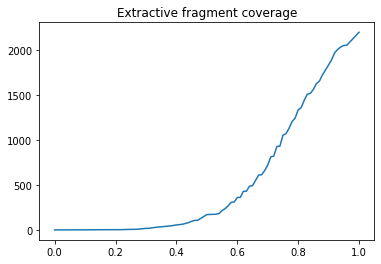

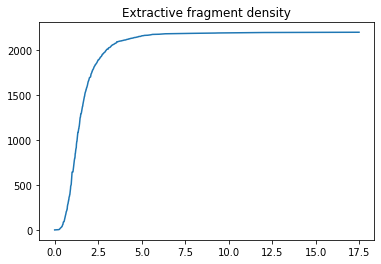

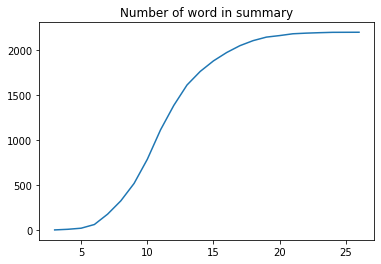

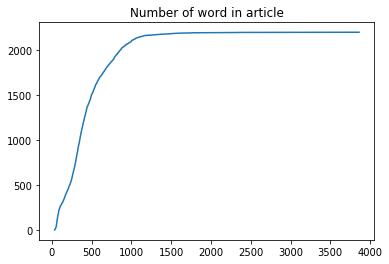

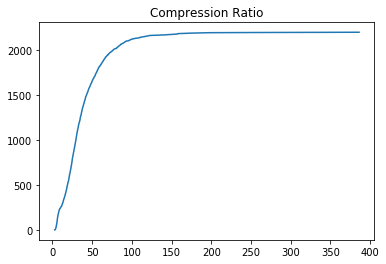

In [29]:
tree = ET.parse('HindustanTimes1.xml')
root = tree.getroot()

vocab_article = set()
vocab_summary = set()

cnt = 0
sentence = 0
word_article = 0
word_highlight = 0
comp_ratio = 0
ext_coverage = 0
ext_density = 0

mean_word_article = {}
mean_word_highlight = {}
mean_cmp_ratio = {}
mean_ext_coverage = {}
mean_ext_density = {}

def extractive_fragment(article, summary):
    F = []
    i = 0
    j = 0
    p = len(article)
    q = len(summary)
    while i < q:
        f = []
        while j < p:
            if summary[i] == article[j]:
                tmp_i = i
                tmp_j = j
                while tmp_i < q and tmp_j < p and summary[tmp_i] == article[tmp_j]:
                    tmp_i += 1
                    tmp_j += 1
                if len(f) < (tmp_i - i):
                    f = summary[i:tmp_i]
                j = tmp_j
            else:
                j += 1
        i = i + max(len(f), 1)
        j = 0
        F.append(f)
    return F
    
for i in range(0, len(root), 4):
    
    highlight = root[i+1].text
    article = root[i+2].text
    
#     print(highlight, article)
    
    highlight = highlight.split('\n')
    
    r = len(highlight)
    
    article = article.split(' ')
    for i in range(r):
        highlight[i] = highlight[i].split(' ')
    
    article = [re.sub('[^a-zA-Z0-9]',' ',char.lower()).replace(' ', '') for char in article]
    article = [char for char in article if char != '']
    
    for i in range(r):
        highlight[i] = [re.sub('[^a-zA-Z]',' ',char.lower()).replace(' ', '') for char in highlight[i]]
        highlight[i] = [char for char in highlight[i] if char != '']
    
    p = len(article)
        
    summary = []
    
    for i in range(r):
        q = len(highlight[i])
        for word in highlight[i]:
            summary.append(word)
        
    m = len(summary)
    
    F = extractive_fragment(article, summary)
    cov = 0
    den = 0
    for f in F:
        cov += len(f)
        den += len(f) * len(f)
    cov = cov / m
    den = den / m
    
    sentence += r
    word_highlight += m
    word_article += p
    
    for j in article:
        vocab_article.add(j)
    
    for j in summary:
        vocab_summary.add(j)
    
    cnt += 1
    
    comp_ratio += (p/m)
    
    
    ext_coverage += cov
    ext_density += den
    
    if round(p/m, 2) in mean_cmp_ratio:
        mean_cmp_ratio[round(p/m, 2)] += 1
    else:
        mean_cmp_ratio[round(p/m, 2)] = 1
    
    if p in mean_word_article:
        mean_word_article[p] += 1
    else:
        mean_word_article[p] = 1
    
    if m in mean_word_highlight:
        mean_word_highlight[m] += 1
    else:
        mean_word_highlight[m] = 1
    
    if round(cov, 2) in mean_ext_coverage:
        mean_ext_coverage[round(cov, 2)] += 1
    else:
        mean_ext_coverage[round(cov, 2)] = 1
        
    if round(den, 2) in mean_ext_density:
        mean_ext_density[round(den, 2)] += 1
    else:
        mean_ext_density[round(den, 2)] = 1
    

# print(len(vocab_article), len(vocab_summary))
    
comp_ratio = comp_ratio / cnt
word_highlight = word_highlight / cnt
ext_coverage = ext_coverage / cnt
ext_density = ext_density / cnt
word_article = word_article / cnt
sentence = sentence / cnt

common = 0
for word in vocab_summary:
    if word in vocab_article:
        common += 1
    
# print(common)
# print(sentence, word_article, word_highlight, comp_ratio, ext_coverage, ext_density)

print("Number of articles-summary pairs: " + str(cnt))
print("Number of distinct words in article: " + str(len(vocab_article)))
print("Number of distinct words in summary: " + str(len(vocab_summary)))
print("Number of distinct words common in article and summary: " + str(common))
print("Mean number of word in summary: " + str(word_highlight))
print("Mean number of word in article: " + str(word_article))
print("Mean number of sentences per article: " + str(sentence))
print("Mean compression ratio: " + str(comp_ratio))
print("Mean extractive fragment coverage: " + str(ext_coverage))
print("Mean extractive fragment density: " + str(ext_density))

def plot(data, title, name):
    x = []
    y = []
    cur = 0
    for key in sorted(data):
        x.append(key)
        cur += data[key]
        y.append(cur)
    
    plt.plot(x, y)
    plt.title(title)
    plt.savefig(name, dpi=300, bbox_inches='tight')
    plt.show()
    
plot(mean_ext_coverage, 'Extractive fragment coverage', 'hindustan_mean_ext_coverage.png')
plot(mean_ext_density, 'Extractive fragment density', 'hindustan_mean_ext_density.png')
plot(mean_word_highlight, 'Number of word in summary', 'hindustan_mean_word_highlight.png')
plot(mean_word_article, 'Number of word in article', 'hindustan_mean_word_article.png')
plot(mean_cmp_ratio, 'Compression Ratio', 'hindustan_mean_cmp_ratio.png')